In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from cdo import Cdo
import os
import glob
from src.Experiments_infos import Data
import xarray as xr
import numpy as np
import  matplotlib.pyplot as plt
from src.Enumerations import Season
from src.plot_funcs import plot_contourf_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:

exp = Data.ICON_CNRM_EXP
cdo = Cdo()
level=70000

In [9]:
year_start= 1984
year_end= 2014


[]

In [6]:
paths_reg = sorted(glob.glob(exp.FI850p_path_raw+f'FI700p_*-*.ncz'))
paths_reg
" ".join(exp.gph_files_raw_gcm)

'/pool/data/CMIP6/data/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/day/zg/gr/v20181206/zg_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19750101-19991231.nc /pool/data/CMIP6/data/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/day/zg/gr/v20181206//zg_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_20000101-20141231.nc'

In [10]:
paths_reg = sorted(glob.glob(exp.FI700p_path_raw+f'FI700p_*-*.ncz'))

cdo.selyear(f'{year_start}/{year_end}',
            input = '-divc,9.81 -daymean -mergetime '+' '.join(paths_reg),
            output = f'{exp.scratch_path}gph{level}_reg_dummy.nc' )
             
cdo.remapbil(exp.clustering_target_grid,
             input=  f'{exp.scratch_path}gph{level}_reg_dummy.nc',
             output= f'{exp.scratch_path}gph{level}_reg_CNRM_3dx3dy.nc')
             
#os.system(f"rm {exp.scratch_path}gph{level}_dummy.nc")



'/work/aa0238/a271093/scratch/gph70000_reg_CNRM_3dx3dy.nc'

In [11]:

cdo.remapbil(exp.clustering_target_grid,
             input= f'-selyear,{year_start}/{year_end} -sellevel,{level} -mergetime  '+" ".join(exp.gph_files_raw_gcm),
             output = f'{exp.scratch_path}gph{level}_gcm_CNRM_3dx3dy.nc' )

'/work/aa0238/a271093/scratch/gph70000_gcm_CNRM_3dx3dy.nc'

In [12]:
gph_reg=xr.load_dataset(f'{exp.scratch_path}gph{level}_reg_CNRM_3dx3dy.nc')
#gph_reg = gph_reg.sel(time=~((gph_reg.time.dt.month == 2) & (gph_reg.time.dt.day == 29)))

gph_gcm=xr.load_dataset(f'{exp.scratch_path}gph{level}_gcm_CNRM_3dx3dy.nc')
gph_gcm = np.squeeze(gph_gcm)

Season.WINTER
Season.SPRING
Season.SUMMER
Season.AUTUMN


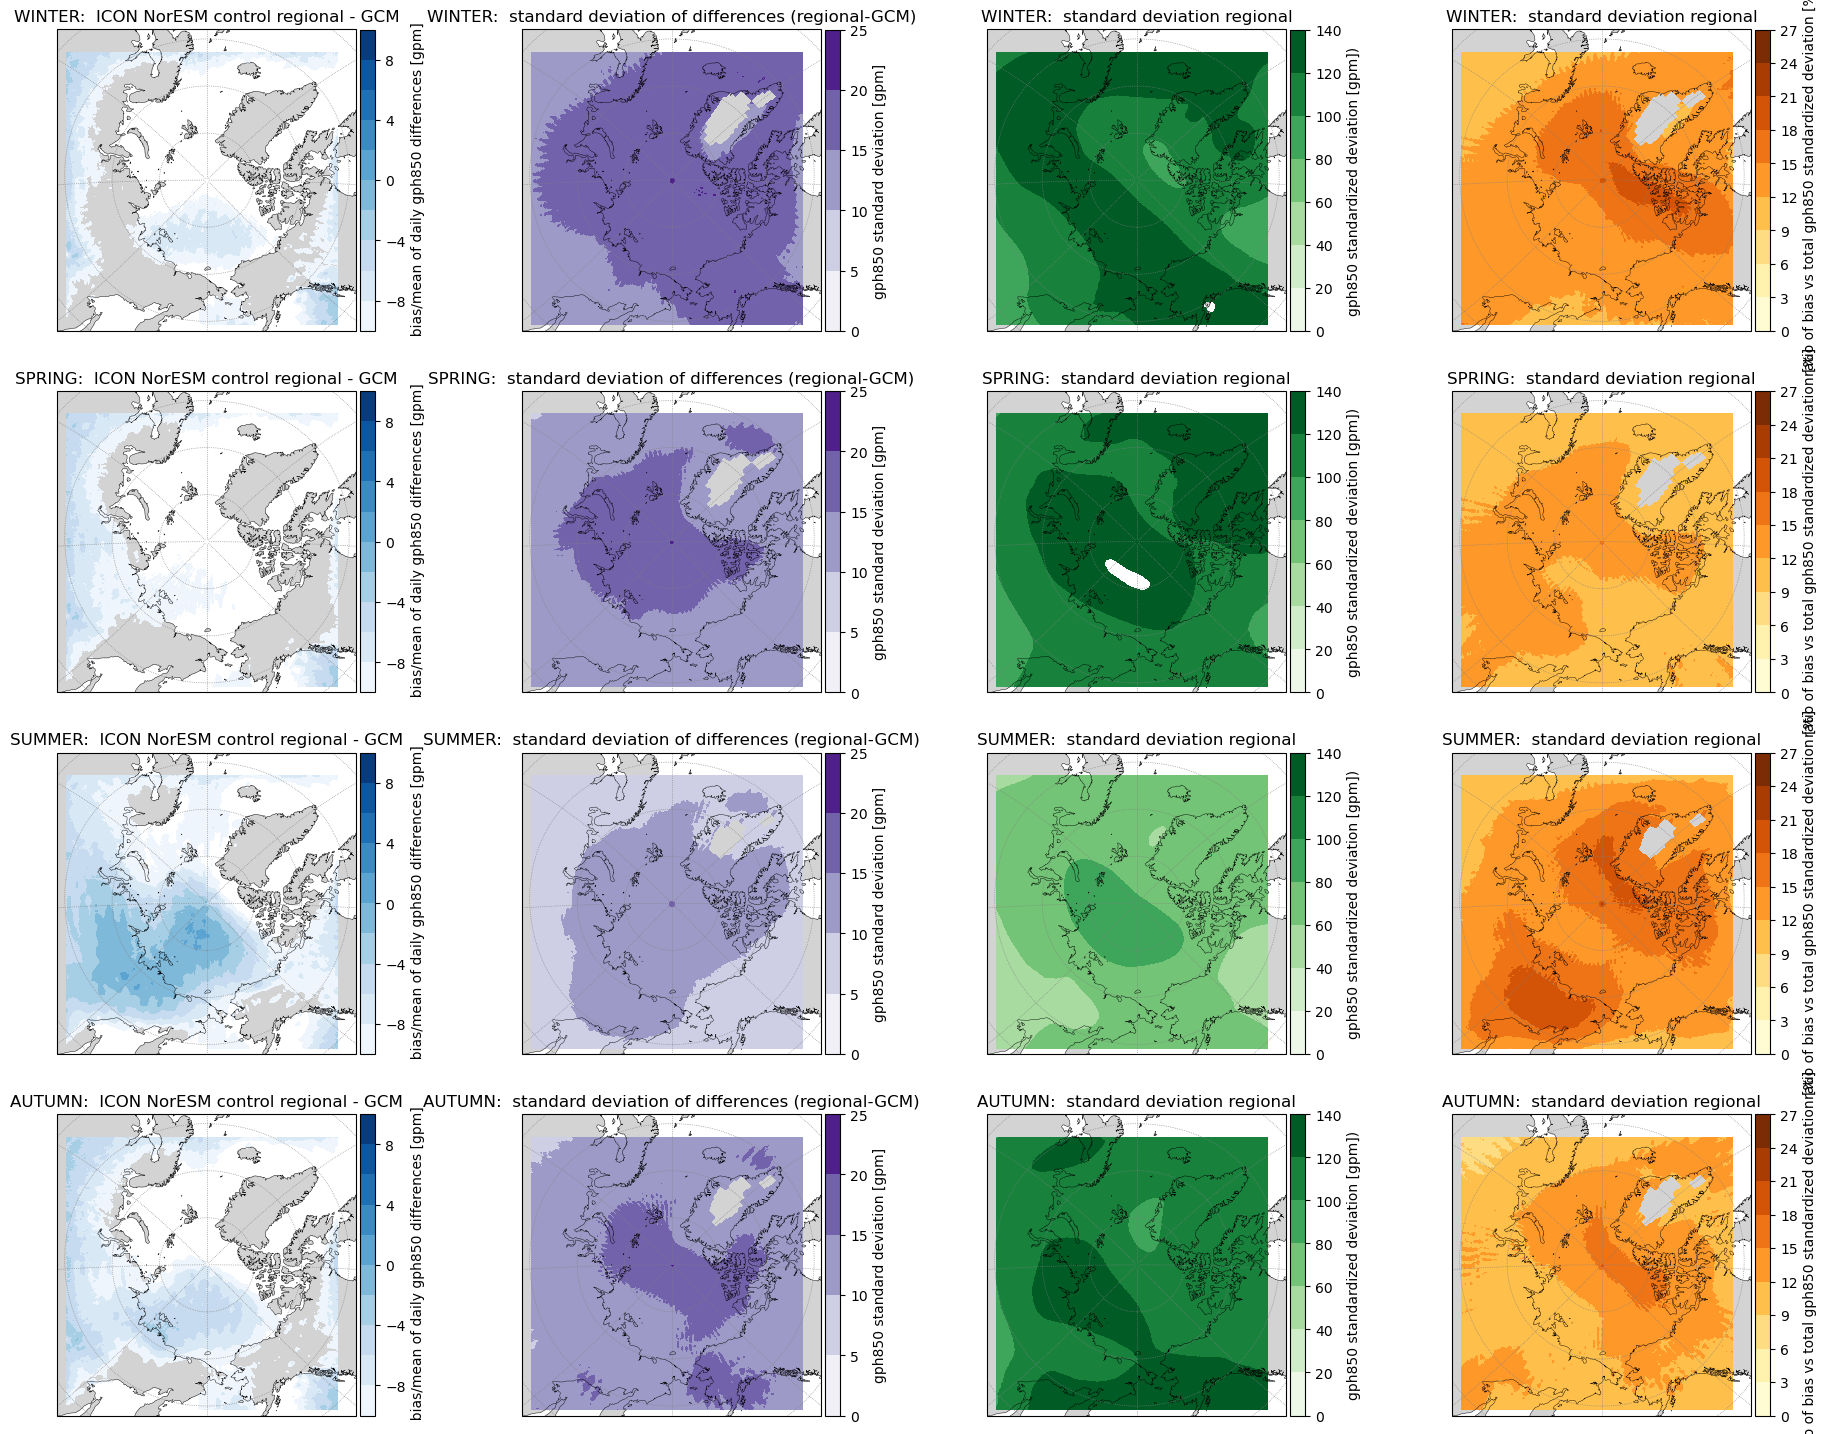

In [13]:
fig = plt.figure(figsize=(23,18))
for  season_, i in zip(Season,[0,4,8,12]):
    print (season_)
    reg_sel = gph_reg.sel(time=gph_reg.time.dt.month.isin(season_.value))
    gcm_sel = gph_gcm.sel(time=gph_gcm.time.dt.month.isin(season_.value))
    
    error = np.mean((reg_sel.FI.values - gcm_sel.zg.values), axis=0)


    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               error, index =i,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  ICON NorESM control regional - GCM',
                              levels =np.arange(-10,11,2),
                              cbar_label= "  bias/mean of daily gph850 differences [gpm] ")
    
    
    std_bias = np.std((reg_sel.FI.values- gcm_sel.zg.values),axis=0)
                  
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               std_bias, index =i+1,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation of differences (regional-GCM)',
                              #levels =np.arange(0,25,2),
                              levels =np.arange(0,30,5),

                              cbar_label= "gph850 standard deviation [gpm]",
                              cmap="Purples")

    std_tot  = np.std(reg_sel.FI.values,axis=0)
    
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               std_tot, index =i+2,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation regional',
                              levels =np.arange(0,160,20),
                              cbar_label= "gph850 standardized deviation [gpm])",
                              cmap="Greens")
    
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               (std_bias/std_tot)*100, index =i+3,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation regional',
                              levels =np.arange(0,30,3),
                              cbar_label= "ratio of bias vs total gph850 standardized deviation [%]",
                              cmap="YlOrBr")

In [41]:
dd=xr.load_dataset(f'/pool/data/CMIP6/data/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrPlevPt/zg/gn/v20191108/zg_6hrPlevPt_NorESM2-MM_historical_r1i1p1f1_gn_198001010300-198912312100.nc')


In [57]:
gph_gcm.zg.values

array([[[1312.9293, 1308.9875, 1306.0038, ..., 1475.828 , 1476.9622,
         1477.9738],
        [1312.5217, 1307.982 , 1304.9121, ..., 1471.3948, 1472.4203,
         1473.4458],
        [1312.324 , 1307.6989, 1302.9072, ..., 1466.8008, 1467.8398,
         1468.9097],
        ...,
        [1234.4891, 1240.73  , 1247.1094, ..., 1314.9218, 1314.3915,
         1314.554 ],
        [1241.0409, 1247.2953, 1253.686 , ..., 1309.4681, 1309.4805,
         1309.5342],
        [1250.0892, 1253.6914, 1260.5768, ..., 1304.5034, 1304.5145,
         1304.5658]],

       [[1340.5574, 1337.858 , 1335.5914, ..., 1444.1562, 1448.6532,
         1453.0438],
        [1341.1772, 1337.9904, 1335.6818, ..., 1441.3456, 1446.0343,
         1450.4551],
        [1342.0455, 1338.8048, 1335.3988, ..., 1438.3177, 1443.0331,
         1447.8038],
        ...,
        [1404.5548, 1405.4763, 1406.5635, ..., 1377.2776, 1378.4901,
         1379.4558],
        [1411.0574, 1412.0299, 1413.1656, ..., 1372.5247, 1373.9814,
   

In [49]:
gph_reg.FI.values.shape

(11315, 194, 193)